<a href="https://colab.research.google.com/github/kwag-serin/DAP_/blob/main/Lecture8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os, random

# Startup Data
In this lab, we would like to do multiple linear regression analysis with start-up dataset.

In [2]:
dataPath = 'https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/'
df = pd.read_csv(dataPath + '50_Startups.csv')

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


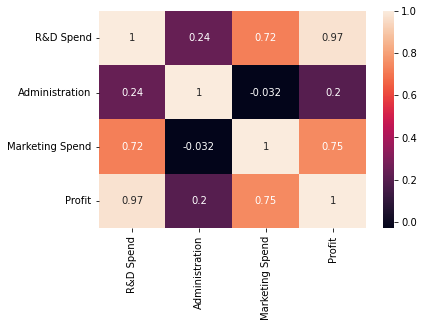

In [3]:
sns.heatmap(df.drop(columns='State').corr() , annot=True)

# Independent and Dependent variables
There are total 5 features in the dataset.

**[TODO]** Split the data that `Profit` is our dependent feature, and the rest of them are our independent features:

In [4]:
# separate the independent attributes from the predicting attribute
X = df.drop('Profit',axis=1)

# separte the dependent attribute into Y for model training 
y = df['Profit']

# Handling categorical variables
**[TODO]** In our dataset, there is one categorical column `State`, convert this categorical values present inside this column for that we will use pandas `get_dummies()` function:


In [5]:
# handle categorical variable
X = pd.get_dummies(X)

X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


# Splitting Data
**[TODO]** Split the data into training (80%) and testing (20%) parts for that we use the scikit-learn `train_test_split()` function. Set `random_state` as `42`.

In [6]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Training model
**[TODO]** Apply the linear regression model to our training data, first of all, we have to import linear regression from the scikit-learn library.

In [7]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(X_train, y_train)

LinearRegression()

In [8]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
13,91992.39,135495.07,252664.93,1,0,0
39,38558.51,82982.09,174999.30,1,0,0
30,61994.48,115641.28,91131.24,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
17,94657.16,145077.58,282574.31,0,0,1
48,542.05,51743.15,0.00,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
25,64664.71,139553.16,137962.62,1,0,0
32,63408.86,129219.61,46085.25,1,0,0
19,86419.70,153514.11,0.00,0,0,1


In [9]:
y_prediction = LR.predict(X_test)
y_prediction

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

# Evalutation
Compare the `y_prediction` values with the original values using `r2_score` and `RMSE`.

In [10]:
# importing metrics module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.8987
root_mean_squared error of is 9055.96


# [Todo!] Regression 실습

자동차의 스펙에 기반해서 책정가격을 regression 기법을 통해 예상해보도록 하죠!

In [11]:
df_price = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/CarPrice_Assignment.csv', index_col='car_ID').drop(columns =['CarName'])

In [12]:
df_price

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# 1. Data 전처리
Data를 원하는 방법으로 전처리하세요.
(ex. Imputation, Scaling)

그리고 독립변수 X와 종속변수 y를 나누어주세요.

**[팁]**

1. 데이터 전처리는 모델의 성능에 직접적으로 개입할 수 있는 몇 안되는 수단이에요.
2. 당장 regression에서는 유의미한 차이를 보기 힘들지도 몰라요, 하지만 나중에 더 어려운 데이터를 만났을 때는 큰 차이를 보이기도 한답니다.
3. 여러분의 선택으로 정해진 모델의 성능은 여러분의 점수에 영향을 미칠 예정이에요, 신중하게 선택해주세요.

**[고려할 수 있는 수단]**
1. Encoding은 필수겠네요? 어떤 encoding 방법을 선택할 지는 여러분께 달렸어요!
2. Scaler을 사용할지 안할지 또한 여러분의 선택이에요, 만약 사용해야한다면 어떤 Scaler을 사용할지 또한 고려하셔야겠네요?

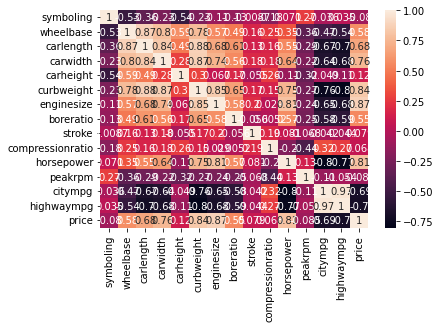

In [25]:
## 원하는 방법으로 데이터를 전처리하세요 ##
sns.heatmap(df_price.corr(), annot=True)

In [31]:
## X, y split ##
X = df_price.drop('price', axis=1)
y = df_price['price']

X = pd.get_dummies(X)

# 2. Train_set, test_set 나누기
이제 학습에 사용할 데이터와 모델 검증에 사용할 테스트 데이터를 나눌 예정이에요.

**[조건]**
- test_size는 0.2로, random_state는 42로 지정해주세요
- 테스트 데이터는 절대 학습 과정에 관여하면 안돼요!
- 조건에 어긋난 경우, 채점을 하지 않을 예정이니 주의해주세요...!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42) #### ,####, test_size = 0.2, random_state = 42)

# 3. 학습!

원하는 모델을 선언하세요. 참고로 regression 모델은 정말 많답니다. 이 문서를 참조해 보시겠어요?

https://scikit-learn.org/stable/supervised_learning.html

이곳에서 데이터에 적절하다고 생각되는 **regression model** 을 골라서 선언하세요. 그리고 2에서 나눈 데이터를 이용해 학습하는 거예요!

모델을 선언하는 예시는 제가 LinearRegression으로 만들어 보았어요. 참고해서 사용하세요!

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor() # 원하는 모델로 바꿔서 사용하기!

## 모델을 학습하는 코드 작성 ##
model.fit(X_train, y_train)

RandomForestRegressor()

# 4. 모델 평가

이제 모델을 평가해볼 시간이에요! 저는 여러분의 모델을 아래에 있는 **r2_score**와 **root_mean_squared_error**을 이용해서 채점할 예정이에요.

모델의 점수는 여러가지 원인으로 갈려요. 적절한 모델을 선택했는지, 그리고 그 모델에서 HyperParameter을 어떻게 설정했는지, 심지어 Data의 전처리 때문에 점수가 갈리는 경우도 있어요.

모델을 평가하는 코드를 완성하여 여러분의 모델을 채점해보세요.

In [35]:
# 해당 점수로 채점할거예요.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
## 모델을 TEST 하는 코드 작성 ##

y_predict = model.predict(X_test)

## 채점은 여기서!
your_score = r2_score(y_test,y_predict)
print(f'R2_score is {your_score:.4f}, RMSE is {np.sqrt(mean_squared_error(y_test, y_predict)):.4f}')

R2_score is 0.9580, RMSE is 1821.9365


# 5. 최종 채점

여러분의 과제는 모델의 RMSE 수치에 따라 채점될 예정이에요

채점 기준은 다음과 같으니 참고하시길 바래요.

**[채점 기준]**

- 이번 과제는 런타임 초기화 후, 처음으로 출력된 점수에 대해서만 평가해요.
- RMSE 수치가 2200 미만: **50점 (만점)**
- RMSE 수치가 2200 이상, 3000 미만: **45점**
- RMSE 수치가 3000 이상, 3500 미만: **35점**
- RMSE 수치가 3500 이상, 5000 미만: **25점**
- RMSE 수치가 5000 이상, 혹은 **R2_score가 0 미만**: **0점**

## **More...?**

만약 regression에 대해 조금 더 공부를 하시고 싶으시다면 아래의 자료로도 regression 모델을 만들어보세요.

해당 자료로 만들어진 모델은 채점에 들어가지 않으니 부담갖지 않으셔도 돼요!

In [37]:
df_insurance = pd.read_csv('https://raw.githubusercontent.com/TA-YSH/DAP/main/lab8/insurance.csv')